<a href="https://colab.research.google.com/github/brromeroc/Eigenfaces/blob/main/Eigenfacessklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solución taller Eigenfaces.

Construya un algoritmo que aprenda una representación basado en eigenfaces.



###**1.** Seleccione un dataset adecuado para la construcción de la representación.

$\underline{\textit{Solución}}$

El Dataset  con el cual se trabajara fue tomado de  $[2]$, es un dataset que condensa las imagenes de  las caras de $40$ personas tomadas de frente en escala de grises (Cada entrada de la matriz tiene un valor entre $[0,1]$ que representa una escala de grisis, como esta en este intervalo se dice que los valores de las entradas estan normalizados), haciendo diferentes muecas. De cada persona se tomaron $10$ fotos y cada imagen tiene $64\times64$ pixeles es decir trabajaremos con filas de dimención $4096$, es por ellos que la matriz que observaremos sera de $400\times 4096$, sumado a esto hay una columna adicional en la cual cada entrada  sera la etiquieta de cada vector de $1\times 4096$ correspondiente a la persona a la cual representa este vector en la imagen.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from numpy.linalg import eig

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv("/content/face_dataa.txt", sep=",", header=None)

#df=pd.read_csv("/content/face_data.csv",sep=",",error_bad_lines=False,header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,4087.000000,4088.000000,4089.000000,4090.000000,4091.000000,4092.000000,4093.000000,4094.000000,4095.000000,target
1,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
2,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
3,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
4,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
397,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
398,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
399,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [ ]:
df.shape  #Tamaño de la matriz anterior

(401, 4097)

In [ ]:
df=df[1:401]

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
1,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
2,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
3,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
4,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
5,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
397,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
398,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
399,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


**Visualización**

Ahora procedamos a visualizar los anteriores datos, para ello utilizaremos el siguiente código:

In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(10, 10, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()



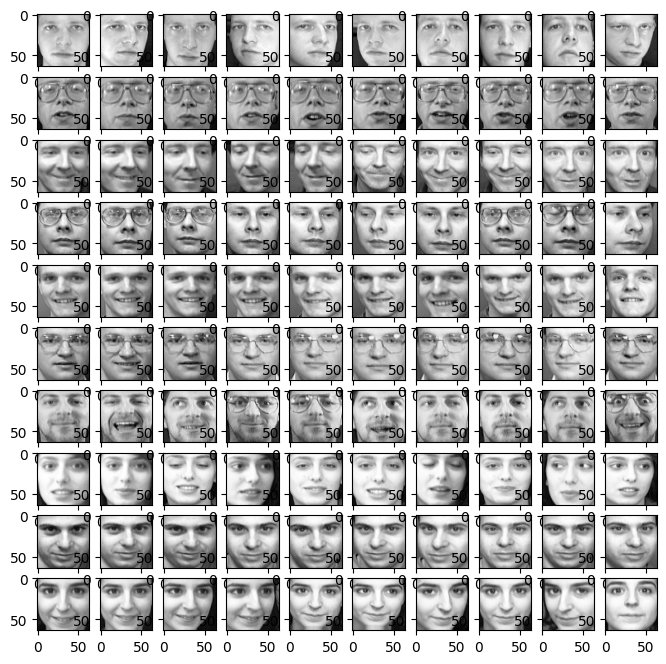

In [ ]:
import matplotlib.pyplot as plt
X = df.drop(4096, axis=1)
y = df[4096]


plot_faces(X)

### **2.** Implemente el algoritmo de eigenfaces.


$\underline{\textit{Solución}}$

Recordemos que el algoritmo Para hallar las eigenfaces dado en clase es  el siguiente: (tamado de $[3]$)

1. Calcular la media $\mu_{i}$ de cada columna en la matriz, dándonos el valor de intensidad de píxel promedio para cada coordenada $(x, y)$ en el conjunto de datos de la imagen.

2. Restar el $\mu_{i}$ de cada columna $c_i$  esto se llama centrar los datos en la media y es un paso obligatorio cuando se realiza PCA.

3. Ahora que nuestra matriz $M$ se ha centrado en la media, calcule la matriz de covarianza.

4. Realice una descomposición de valores propios en la matriz de covarianza para obtener los valores propios $\lambda_{i}$ y vectores propios $\mathbf{X_{i}}$.

5. Clasificar $\mathbf{X_{i}}$ por $|\lambda_{i}|$, de mayor a menor.

5. Tome los $N$ vectores propios superiores con la magnitud de valor propio correspondiente más grande.

6. Transforme los datos de entrada proyectándolos (es decir, tomando el producto escalar) en el espacio creado por los $N$ vectores propios superiores ; estos vectores propios se llaman nuestras caras propias.

In [ ]:
# 1-------------------------

dfmatrix=np.array(df)

dfmatrix=dfmatrix[:,0:4096]

mu=(1/4096)*np.sum(dfmatrix,axis=0)

#2--------------------------

for i in range(4096):
    dfmatrix[:,i]= dfmatrix[:,i]-mu[i]*np.ones(400)


In [ ]:
dfmatrix.shape

(400, 4096)

In [ ]:
#3-------------------------
import numpy as np
from scipy.linalg import eigh


dfmatrix=np.transpose(dfmatrix)

#covmatrixhecha=np.cov(dfmatrix.astype(float), bias=True)

#4-------------------------


In [ ]:
 #Cálculo de la matriz de covarianza

covmatrix=np.identity(4096)



for j in range(4095):

 for i in range(4095):

  covmatrix[i,j]= (1/4095)*(dfmatrix[i,:]@dfmatrix[j,:])

In [ ]:
#5-------------------------

w,v=eigh(covmatrix)  #En este caso w es el vector donde cada entrada son los valores propios de la matriz covmatrix, y v es la matriz en donde cada fila es un vector propio correspndiente a los valores propios de las  filas de w

In [ ]:
import numpy as np
import numpy.linalg as linalg



idx = w.argsort()[::-1]   
eigenValues = w[idx]
eigenVectors = v[:,idx]

In [ ]:
eigenValues    #Valores propiois 

array([ 1.02587991e+02,  1.11060767e+00,  1.00000000e+00, ...,
       -1.85592688e-14, -2.09062408e-14, -6.06936022e-14])

In [ ]:
LargesteignValues=eigenValues[0:399]    #Tomamos los primero 400 valores propios pues son los que tienen mayor aporte, los otros son insignificantes en tamño al compararlos( diferencia de 10^-12)
LargesteignVectors=eigenVectors[0:399,:]

In [ ]:
LargesteignValues

array([1.02587991e+02, 1.11060767e+00, 1.00000000e+00, 6.23007231e-01,
       3.93666083e-01, 3.21631766e-01, 2.43610123e-01, 1.94945245e-01,
       1.63560213e-01, 1.56073808e-01, 1.28848778e-01, 1.24367560e-01,
       1.11511501e-01, 9.65421730e-02, 9.42166947e-02, 8.27826048e-02,
       7.67013793e-02, 7.23589731e-02, 6.73325174e-02, 5.85216662e-02,
       5.77063049e-02, 5.49200500e-02, 4.75649417e-02, 4.61347594e-02,
       4.47924417e-02, 4.20893383e-02, 4.10288682e-02, 3.96228745e-02,
       3.82612648e-02, 3.56694136e-02, 3.41241863e-02, 3.13709278e-02,
       3.01109930e-02, 2.84773628e-02, 2.59537289e-02, 2.56834770e-02,
       2.43435309e-02, 2.39398629e-02, 2.30861809e-02, 2.17507087e-02,
       2.11236280e-02, 2.02822871e-02, 1.95899160e-02, 1.92097520e-02,
       1.87357053e-02, 1.84874682e-02, 1.77728964e-02, 1.73875831e-02,
       1.71161830e-02, 1.63057133e-02, 1.58296558e-02, 1.52466373e-02,
       1.48801440e-02, 1.45194252e-02, 1.40727791e-02, 1.36986698e-02,
      

In [ ]:
LargesteignVectors   #vectores propios asociados a los valores propios mas grandes 

array([[-1.11852836e-02, -2.74398899e-02,  0.00000000e+00, ...,
        -1.24215358e-01,  1.47530284e-01, -3.31244955e-02],
       [-1.21819885e-02, -3.09275126e-02,  0.00000000e+00, ...,
         3.34699420e-02, -4.30282823e-02,  6.46175439e-01],
       [-1.33864001e-02, -3.45659437e-02,  0.00000000e+00, ...,
         4.68098896e-03, -3.26657754e-02, -1.06953782e-01],
       ...,
       [-1.82175495e-02, -7.36435189e-03,  0.00000000e+00, ...,
        -1.06308414e-02,  1.85942220e-03,  3.21768456e-04],
       [-1.82679234e-02, -5.47068550e-03,  0.00000000e+00, ...,
         2.64505836e-03,  4.04552609e-03, -3.45072755e-03],
       [-1.82855443e-02, -3.81145766e-03,  0.00000000e+00, ...,
        -2.89337661e-03, -6.01703819e-03, -8.76812739e-03]])

In [ ]:
LargesteignVectors.shape  #dimención de la matriz de eigenvectors

(399, 4096)

In [ ]:
LargesteignVectors[200,:]@np.transpose(LargesteignVectors[200,:])  #Corroborando que son realmente unitarios 

0.9999999999999998

In [ ]:
Eigenfaceslista = pd. DataFrame (LargesteignVectors)
Eigenfaceslista=Eigenfaceslista.assign(target=1)

In [ ]:
Eigenfaceslista

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,-0.011185,-0.027440,0.0,-0.000376,0.002850,-0.016205,-0.030813,-0.027592,-0.046750,-0.011670,...,0.000000,0.000000,0.000000,0.000000,0.151884,-0.119041,-0.124215,0.147530,-0.033124,1
1,-0.012182,-0.030928,0.0,0.002397,-0.001682,-0.012793,-0.033370,-0.018676,-0.052302,-0.019544,...,-0.004719,-0.021970,0.011868,-0.007404,0.014692,0.024525,0.033470,-0.043028,0.646175,1
2,-0.013386,-0.034566,0.0,0.003253,-0.012491,-0.011767,-0.030918,-0.010517,-0.048200,-0.025512,...,0.016640,-0.185177,0.009621,0.264088,-0.098419,0.182255,0.004681,-0.032666,-0.106954,1
3,-0.014576,-0.035952,0.0,0.002418,-0.019693,-0.011613,-0.029328,-0.007470,-0.037120,-0.025614,...,-0.000231,-0.083978,0.054303,-0.346174,-0.111941,-0.203646,0.200643,-0.193508,0.047616,1
4,-0.015592,-0.034997,0.0,0.000738,-0.024721,-0.013514,-0.027243,-0.002411,-0.027650,-0.024082,...,-0.016920,-0.253817,0.049226,-0.003521,-0.122358,-0.114621,-0.243357,0.125539,0.259724,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,-0.018182,-0.012803,0.0,-0.021990,-0.005102,-0.024008,-0.008908,0.003093,-0.006789,0.019260,...,-0.009650,-0.006457,0.018032,0.000931,-0.008458,-0.007814,-0.008128,0.005699,0.005847,1
395,-0.018211,-0.010314,0.0,-0.025150,-0.002625,-0.024641,-0.009852,0.002246,-0.007222,0.020974,...,-0.007097,-0.008743,0.004038,-0.002862,-0.002123,-0.005181,-0.000956,0.004230,-0.001971,1
396,-0.018218,-0.007364,0.0,-0.027506,0.000260,-0.024368,-0.012045,0.000083,-0.007818,0.022362,...,0.007731,-0.004618,0.009834,0.006414,0.002958,0.010892,-0.010631,0.001859,0.000322,1
397,-0.018268,-0.005471,0.0,-0.029698,0.001757,-0.024233,-0.013332,-0.000747,-0.006441,0.022726,...,0.004255,0.001663,0.009707,-0.005321,0.004797,-0.009206,0.002645,0.004046,-0.003451,1


**Eigenfaces Visualización**

In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(10, 10, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()




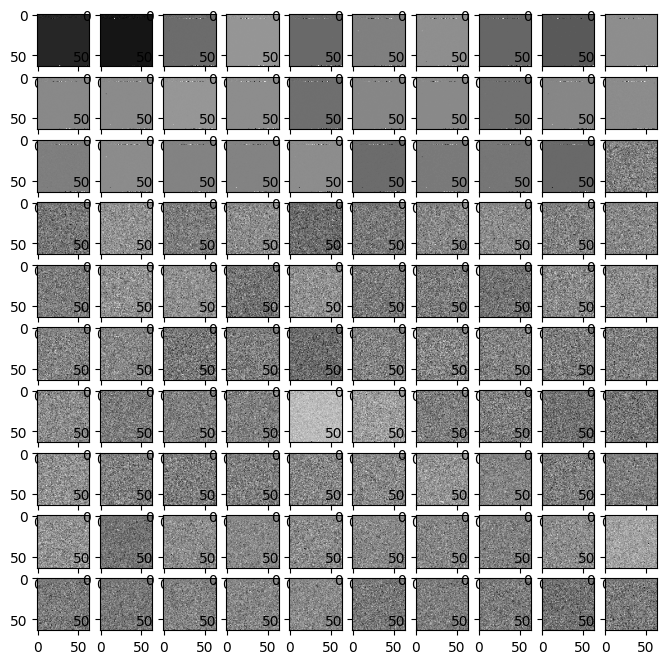

In [ ]:
import matplotlib.pyplot as plt
X = Eigenfaceslista.drop('target', axis=1)
y = Eigenfaceslista['target']


plot_faces(X)

Dado que hay problemas con el númerico que calcula los valores propios, entonces opte por utilizaar skelearn.

**Con skelearn**

In [ ]:
data=np.array(df)
X=data[:,0:4096]
y=data[:,4096]
target_names =np.array(range(40))

In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform



lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = (400, 50, 37)
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X=data[:,0:4096]
n_features = X.shape[1]
# the label to predict is the id of the person
y=data[:,4096]
target_names =np.array(range(40))
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 400
n_features: 4096
n_classes: 40


In [ ]:
n_components=400
pca = PCA(n_components, svd_solver="randomized", whiten=True).fit(X)
caraspropias=pca.components_



In [ ]:
onee=pd.DataFrame(np.ones(400))

onee = pd.DataFrame({'target': onee}, columns = ['targett'])
caras=pd.DataFrame(caraspropias) 
caras = pd.concat([caras, onee], axis=1,)
caras

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,targett
0,-0.004191,-0.007110,-0.009336,-0.010610,-0.011415,-0.012313,-0.012802,-0.013595,-0.014173,-0.014977,...,-0.009805,-0.008242,-0.007969,-0.005624,-0.001644,0.000191,0.000185,0.003380,0.003188,NaN
1,-0.028591,-0.033288,-0.037846,-0.039618,-0.038739,-0.037156,-0.034252,-0.030408,-0.027239,-0.024245,...,0.023881,0.025722,0.027040,0.028637,0.030591,0.031517,0.029628,0.027213,0.024889,NaN
2,0.001357,-0.000326,-0.000198,0.001060,0.002791,0.004115,0.005633,0.007652,0.009914,0.011387,...,-0.027589,-0.027646,-0.026332,-0.022286,-0.019645,-0.017652,-0.015414,-0.013710,-0.011883,NaN
3,0.001124,-0.001790,-0.011682,-0.018661,-0.024068,-0.027349,-0.029433,-0.028931,-0.028208,-0.027918,...,0.019152,0.019105,0.018912,0.023486,0.023840,0.025529,0.029430,0.027819,0.025219,NaN
4,-0.023843,-0.023591,-0.022161,-0.020022,-0.020120,-0.018667,-0.015918,-0.012253,-0.010120,-0.008995,...,-0.021568,-0.024958,-0.030759,-0.032783,-0.034649,-0.042128,-0.042439,-0.040075,-0.041103,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.001495,-0.014647,0.014823,0.018010,-0.007402,-0.000860,-0.021394,-0.020826,-0.003862,-0.005603,...,-0.012651,0.015076,-0.006936,0.034027,0.031680,0.008384,-0.014969,-0.043895,0.057119,NaN
396,-0.022156,-0.002922,0.016367,0.000427,0.006752,-0.016403,-0.019654,-0.019422,-0.001756,-0.003811,...,-0.005696,-0.014100,0.013775,0.002038,0.048229,-0.002491,-0.045172,-0.009879,0.014769,NaN
397,0.002235,0.020567,0.015159,0.000324,0.003686,-0.003244,0.010035,0.008815,0.017514,-0.013774,...,0.042560,0.010804,0.007998,0.011277,-0.013993,-0.022500,-0.012736,-0.058490,-0.076503,NaN
398,0.017148,0.029177,-0.009425,-0.002259,0.000458,-0.005821,0.007576,0.001097,0.007635,0.008079,...,0.014867,-0.014178,-0.028277,-0.006784,0.039954,-0.017233,0.001591,0.012493,-0.008153,NaN


In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(10, 10, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()


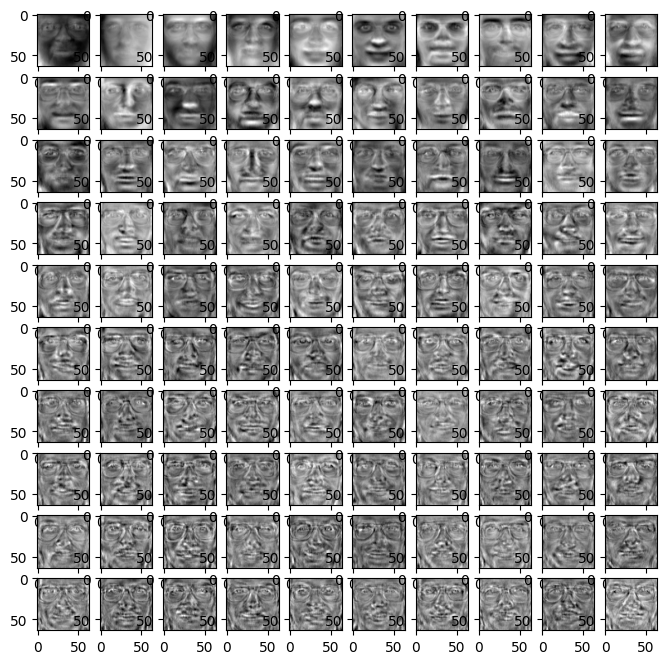

In [ ]:

import matplotlib.pyplot as plt
X = caras.drop('targett', axis=1)
y = caras['targett']


plot_faces(X)

### **3.** Encuentre cuales son los eigenfaces que mejor explican una imagen suya.

$\underline{\textit{Solución}}$

Acontinuación utilizamos $\texttt{image}$ de $\texttt{ matplotlib}$, para visualizar una imgagen mia, y de paso ver cuales son los eigenfaces que mejor explican mi cara  (Procedimiento tomado de [6])

Primero colocamos cargamos mi cara




float32
(439, 333, 3)


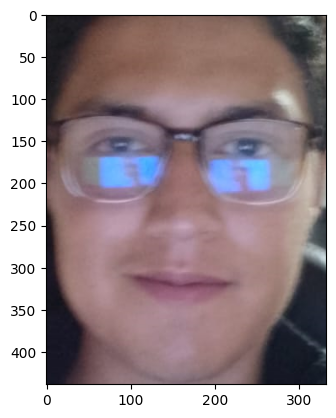

In [ ]:

from matplotlib import image
from matplotlib import pyplot
# cargar una imgen como una matriz de pixeles
image = image.imread('Fotomia.jpeg')
# Resumen de la cantidad de pixeles de la igagen
print(image.dtype)
print(image.shape)
#Mostrar la matriz de pixeles.
pyplot.imshow(image)
pyplot.show()

Ahora convertimos mi imagen a una matriz de pixeles

In [ ]:
#Convertir la matriz de pixles anterior a una numpyarray

from PIL import Image
from numpy import asarray
# cargar la imagen
image = Image.open('Fotomia.jpeg')
# convertir la imagen a una numpyarray
data = asarray(image)
print(type(data))
# resumen dimenciones matriz
print(data.shape)

# Pasar imagen a Image de PIL
image2 = Image.fromarray(data)
print(type(image2))

# Detalles de la imagen
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(439, 333, 3)
<class 'PIL.Image.Image'>
RGB
(333, 439)


Ahora pasamos nuestra imgen al igual que las fotos del experimento a una escala de grises (En colab se ve como azul pero en realidad lo lee como grises)

In [ ]:

#Pasar imagen a escala de grises

import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot


img = Image.open('Fotomia.jpeg')
#Pasar imgen a grises con "L"
imgGray = img.convert('L')
#Guerdar imgen de gris en Fotomia.png
imgGray.save('Fotomia.png')
image = image.imread('Fotomia.png')


Ahora que tenemos la imagen en grises procemos a reesclarla para que quede una imgen de 64x64 pixeles, como las fotos del experimento

In [ ]:
#Cambiar tamaño a 64x64
from matplotlib import image
from matplotlib import pyplot
load_img_rz = np.array(Image.open('Fotomia.png').resize((64,64)))  #Imagen reescalada 
Image.fromarray(load_img_rz).save('Fotomiareescalada.png')
print("After resizing:",load_img_rz.shape)

image = image.imread('Fotomiareescalada.png')
print(image.shape)




After resizing: (64, 64)
(64, 64)


Ahora pasamos esta ultima imagen a una matriz de pixeles

In [ ]:
#Convertir la matriz de pixles anterior a una numpyarray

from PIL import Image
from numpy import asarray
# cargar la imagen
image = Image.open('Fotomiareescalada.png')
# convertir la imagen a una numpyarray
data = asarray(image)
print(type(data))
# resumen dimenciones matriz
print(data.shape)

# Pasar imagen a Image de PIL
image2 = Image.fromarray(data)
print(type(image2))

# Detalles de la imagen
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(64, 64)
<class 'PIL.Image.Image'>
L
(64, 64)


In [ ]:
newdata=data[0,:]
for i in range(63):
  newdata = np.concatenate((newdata , data[i+1,:]))

myface= (1/100)*newdata

In [ ]:
micara=np.concatenate((newdata,np.transpose(np.ones(1))))
micara= (1/100)*np.array([micara,micara])
df=pd.DataFrame(micara)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,0.27,0.28,0.28,0.29,0.29,0.28,0.28,0.29,0.27,0.28,...,0.24,0.23,0.22,0.24,0.24,0.25,0.27,0.33,0.35,0.01
1,0.27,0.28,0.28,0.29,0.29,0.28,0.28,0.29,0.27,0.28,...,0.24,0.23,0.22,0.24,0.24,0.25,0.27,0.33,0.35,0.01


In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(1, 2, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()


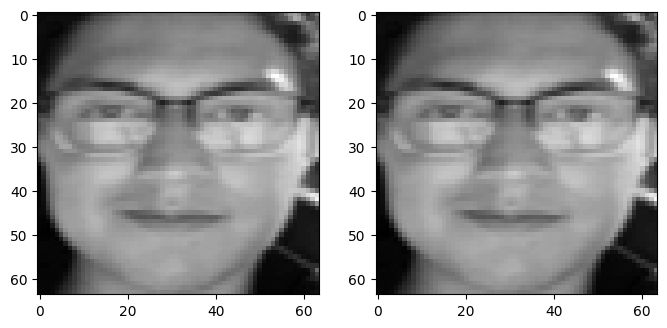

In [ ]:
import matplotlib.pyplot as plt
X = df.drop(4096, axis=1)
y = df[4096]


plot_faces(X)

Ahora proyectemos nuestra cara  sobre las caras propias obtenidas anteriormente, haciendo el respectivo producto punto (Basta hacer esto pues las caras propias son una base ortnormal)

In [ ]:
caraspropias.shape

(400, 4096)

In [ ]:
proyecciones=np.ones(400)

for i in range(400):

 proyecciones[i]=abs(myface@caraspropias[i,:])  #Producto punto entre mi cara y las caras propias

In [ ]:
import numpy as np
import numpy.linalg as linalg   

idx = proyecciones.argsort()[::-1]   
proyeccionesvalue = proyecciones[idx]    #Organización de las caras propias que mas se parecen a la  mia, de mayor a menor producto punto
proyeccionescaras= caraspropias[idx,:]

In [ ]:
proyeccionesvalue

array([7.33471050e+01, 8.87437738e+00, 7.58016819e+00, 6.63425575e+00,
       6.14474781e+00, 5.14123323e+00, 5.12466794e+00, 5.02355242e+00,
       3.95330965e+00, 2.90527350e+00, 2.78427352e+00, 2.77069188e+00,
       2.75792698e+00, 2.74206117e+00, 2.69889963e+00, 2.69134040e+00,
       2.56260860e+00, 2.53301299e+00, 2.50347520e+00, 2.43631726e+00,
       2.39057550e+00, 2.36712775e+00, 2.30372884e+00, 2.25899086e+00,
       2.15237492e+00, 2.11262833e+00, 2.09568700e+00, 1.94376435e+00,
       1.90771972e+00, 1.85524933e+00, 1.81563954e+00, 1.79860880e+00,
       1.79111843e+00, 1.70518659e+00, 1.64744596e+00, 1.59341252e+00,
       1.58036488e+00, 1.48606710e+00, 1.43946073e+00, 1.43504536e+00,
       1.33866688e+00, 1.27382698e+00, 1.25647022e+00, 1.24527872e+00,
       1.24380847e+00, 1.24139105e+00, 1.23866031e+00, 1.20565658e+00,
       1.19545864e+00, 1.17586097e+00, 1.17433092e+00, 1.14676415e+00,
       1.14649720e+00, 1.14581302e+00, 1.13336509e+00, 1.12093273e+00,
      

In [ ]:
onee=pd.DataFrame(np.ones(400))

onee = pd.DataFrame({'target': onee}, columns = ['targett'])    
caras=pd.DataFrame(proyeccionescaras) 
caras = pd.concat([caras, onee], axis=1,)
caras

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,targett
0,-0.004191,-0.007110,-0.009336,-0.010610,-0.011415,-0.012313,-0.012802,-0.013595,-0.014173,-0.014977,...,-0.009805,-0.008242,-0.007969,-0.005624,-0.001644,0.000191,0.000185,0.003380,0.003188,NaN
1,-0.028591,-0.033288,-0.037846,-0.039618,-0.038739,-0.037156,-0.034252,-0.030408,-0.027239,-0.024245,...,0.023881,0.025722,0.027040,0.028637,0.030591,0.031517,0.029628,0.027213,0.024889,NaN
2,0.001124,-0.001790,-0.011682,-0.018661,-0.024068,-0.027349,-0.029433,-0.028931,-0.028208,-0.027918,...,0.019152,0.019105,0.018912,0.023486,0.023840,0.025529,0.029430,0.027819,0.025219,NaN
3,0.029102,0.031306,0.028778,0.027403,0.025365,0.020202,0.016697,0.012526,0.008475,0.005546,...,-0.021906,-0.019652,-0.020515,-0.016861,-0.016987,-0.019393,-0.016359,-0.016374,-0.014909,NaN
4,0.025587,0.030918,0.029384,0.015783,0.004955,0.007622,0.011980,0.015257,0.013655,0.010744,...,-0.022148,-0.022825,-0.026157,-0.027294,-0.023738,-0.019820,-0.022440,-0.027581,-0.026271,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-0.001231,0.012746,0.021271,-0.000550,0.009060,-0.013213,-0.015453,-0.001471,0.020512,0.032469,...,-0.009949,0.000873,0.000860,0.002481,0.021648,0.003641,-0.010638,0.000878,-0.013906,NaN
396,-0.015142,0.003540,0.012442,0.000347,0.004642,0.016315,0.004901,-0.000353,-0.005175,0.013772,...,-0.007570,0.035946,0.023150,-0.003696,-0.007971,-0.008709,-0.031613,-0.037005,0.001077,NaN
397,0.006138,0.018096,-0.003185,-0.018340,-0.001906,-0.000584,-0.012652,-0.007863,0.021154,0.038787,...,0.023224,-0.034825,-0.052041,-0.020241,-0.014216,0.070735,0.036583,0.016883,-0.066096,NaN
398,0.010785,-0.009241,-0.027462,0.004993,0.045240,0.028039,0.002086,0.006209,0.017547,0.008597,...,0.008864,0.028458,-0.020657,-0.004318,-0.014057,-0.016594,0.062084,0.109360,0.006160,NaN


In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(10, 10, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

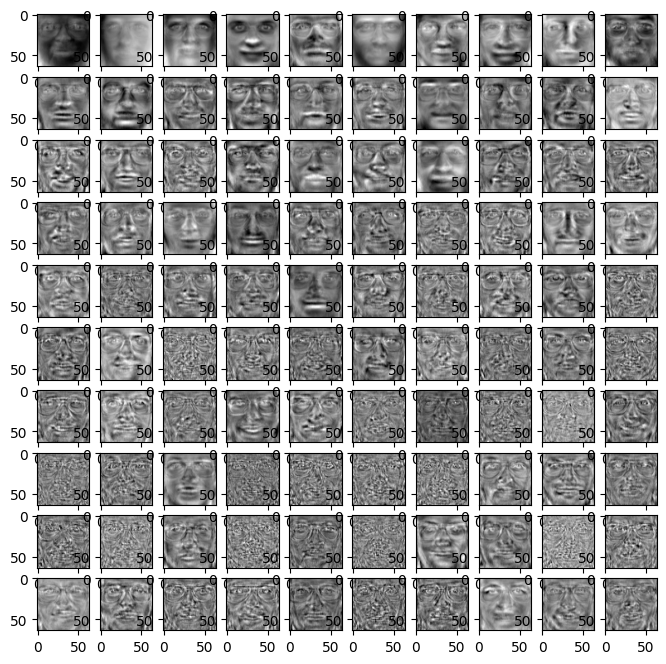

In [ ]:
import matplotlib.pyplot as plt        #visualización de las caras propias, vemos que la que mas se parece a la mia, coindie justamente con la cara propia que tiene un mayor eigenvalue
X = caras.drop('targett', axis=1)      #y que muchas de las caras propias mas parecidas tienen gafas al igual que mi imagen
y = caras['targett']


plot_faces(X)

Ahora intemos reconstruir mi cara tomando una combinación lineal de las caras que mas se parecen a la mia 

In [ ]:
dimencionbase=399


reconstruccioncara=proyeccionesvalue[0]*proyeccionescaras[0,:]

for i in range(dimencionbase):
 reconstruccioncara= reconstruccioncara+proyeccionesvalue[i+1]*proyeccionescaras[i+1,:] 

In [ ]:
reconstruccioncara.shape

(4096,)

In [ ]:
reconstruccioncara=np.concatenate((reconstruccioncara,np.transpose(np.ones(1))))
reconstruccioncaradoble= np.array([reconstruccioncara,reconstruccioncara])
df=pd.DataFrame(reconstruccioncaradoble)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,-0.133513,-0.545416,-0.882459,-1.267769,-1.0693,-0.950101,-1.142275,-1.175424,-1.128859,-1.179999,...,-0.587315,-0.689463,-0.715488,-0.349699,0.72692,0.902444,0.681018,0.420785,-0.002843,1.0
1,-0.133513,-0.545416,-0.882459,-1.267769,-1.0693,-0.950101,-1.142275,-1.175424,-1.128859,-1.179999,...,-0.587315,-0.689463,-0.715488,-0.349699,0.72692,0.902444,0.681018,0.420785,-0.002843,1.0


In [ ]:
def plot_faces(pixels):
    fig, axes = plt.subplots(2, 1, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

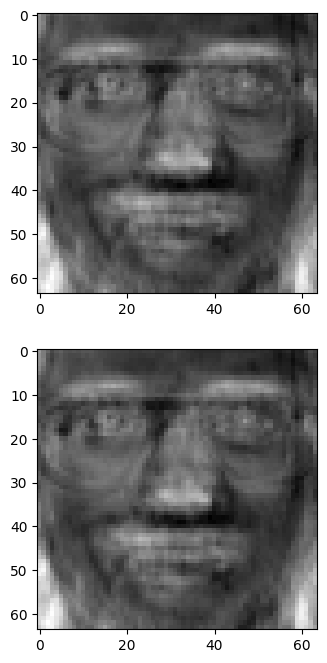

In [ ]:
import matplotlib.pyplot as plt
X = df.drop(4096, axis=1)
y = df[4096]


plot_faces(X)

### **Referencias**



*  [1] Eigenfaces — Face Classification in Python: https://towardsdatascience.com/eigenfaces-face-classification-in-python-7b8d2af3d3ea

*  [2] Github-Face Classification in Python: https://github.com/daradecic/Python-Eigenfaces/blob/master/EigenFaces.ipynb

*  [3] OpenCV Eigenfaces for Face Recognition: https://pyimagesearch.com/2021/05/10/opencv-eigenfaces-for-face-recognition/
*  [4] Ordenar valores propios y vectores propios en python https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt
*  [5] Eigenvalues grandes: https://towardsdatascience.com/eigenvalues-and-eigenvectors-378e851bf372
*  [6] Importing Image Data into NumPy Arrays: https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

